In [1]:
from integrators import contact as ic
from integrators.common import rk4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Osc:
    def __init__(self, alpha):
        self.alpha = alpha

    def f(self, t):
        return alpha
    
    def V(self, q, t):
        return q**2/2
        
    def Vq(self, q, t):
        return q

In [4]:
dt = 0.8
t0 = 0.0
tf = 600.0

tspan = np.arange(t0, tf, dt)
tspansmall = np.arange(t0, tf, dt/8)

upper_error_bound = lambda a, dt, p0, q0: dt**3/12 * a * (a*p0 + q0) + dt**4
upper_error_bound_p = lambda a, dt, p0, q0: dt**3/12 * (2*q0+p0*a+q0*a**2) + dt**4


exact = lambda a, t: np.real((np.exp(-1/2*(np.lib.scimath.sqrt(a**2 - 4) + a)*t)*(
        (np.lib.scimath.sqrt(a**2 - 4) + 2)*np.exp(np.lib.scimath.sqrt(a**2 - 4)*t)
        + a*(np.exp(np.lib.scimath.sqrt(a**2 - 4)*t) - 1) + np.lib.scimath.sqrt(a**2 - 4) - 2)
    )/(2*np.lib.scimath.sqrt(a**2 - 4)))

#exact = lambda a, t: np.exp(-(np.sqrt(-a**2 + 4) - a)*t/2)*(np.cos((np.sqrt(4-a**2)*t)/2) + np.sqrt(4-a**2)*np.sin((np.sqrt(4-a**2)*t)/2))//(2*np.sqrt(-a**2 + 4))

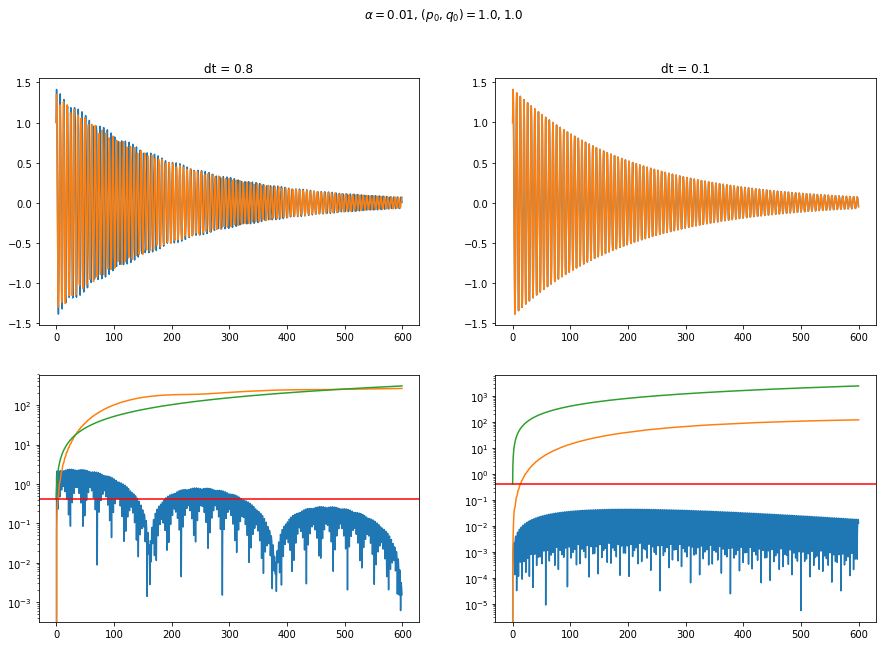

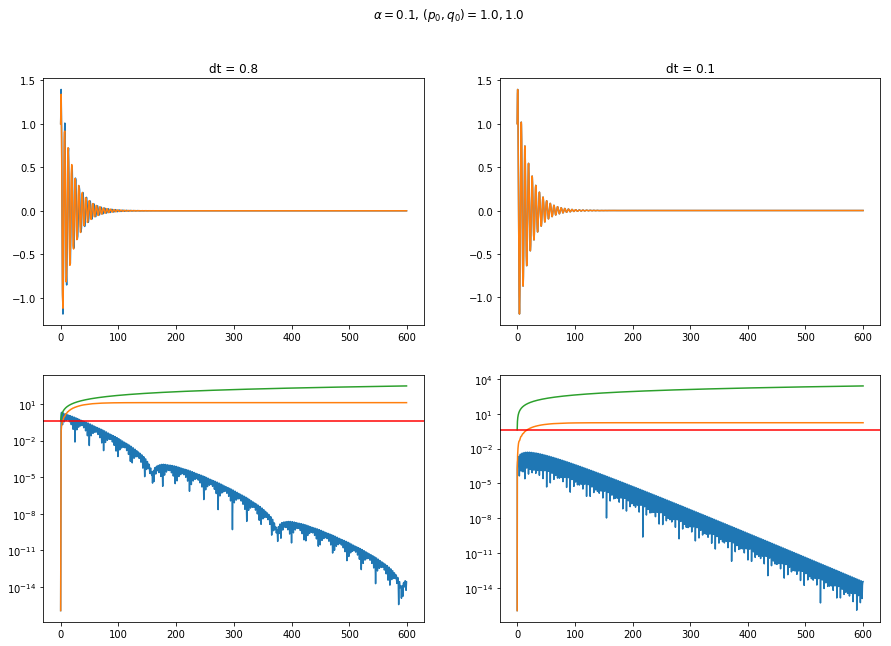

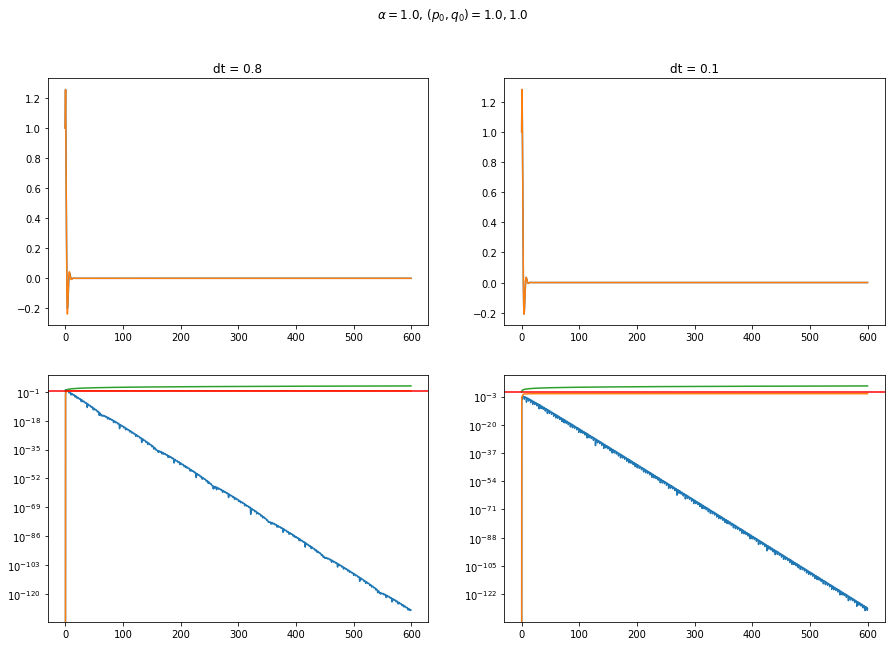

In [5]:
for (alpha, p0, q0) in [(0.01, 1.0, 1.0), (0.1, 1.0, 1.0), (1.0, 1.0, 1.0)]:
    do = Osc(alpha)
    
    plt.figure(figsize=(15,10))
    plt.suptitle(f"$\\alpha = {do.alpha}$, $(p_0, q_0) = {p0}, {q0}$")
    
    plt.subplot(221)
    plt.title(f"dt = {dt}")
    sol, _, _ = ic.integrate(ic.step, do, tspan, p0, q0, 0.0)
    solsmall, _, _ = ic.integrate(ic.step, do, tspansmall, p0, q0, 0.0)

    ex = lambda tspan: exact(alpha, tspan)
        
    plt.plot(tspan, ex(tspan))
    plt.plot(tspan, sol[:,1])

    plt.subplot(222)
    plt.title(f"dt = {dt/8}")
    tspansmall = np.arange(t0, tf, dt/8)
    plt.plot(tspansmall, ex(tspansmall))
    plt.plot(tspansmall, solsmall[:,1])

    plt.subplot(223)
    plt.plot(tspan, abs(sol[:,0]-ex(tspan)))
    plt.plot(tspan, np.cumsum(abs(sol[:,1]-ex(tspan))))
    plt.plot(tspan, np.cumsum([upper_error_bound(alpha, dt, p0, q0) for p0, q0 in sol[:]]))
    plt.axhline(y=upper_error_bound(alpha, dt, p0, q0), c='r')
    plt.yscale('log')

    plt.subplot(224)
    plt.plot(tspansmall, abs(solsmall[:,1]-ex(tspansmall)))
    plt.plot(tspansmall, np.cumsum(abs(solsmall[:,1]-ex(tspansmall))))
    plt.plot(tspansmall, np.cumsum([upper_error_bound(alpha, dt, p0, q0) for p0, q0 in solsmall[:]]))
    plt.axhline(y=upper_error_bound(alpha, dt, p0, q0), c='r')
    plt.yscale('log')
    plt.show()

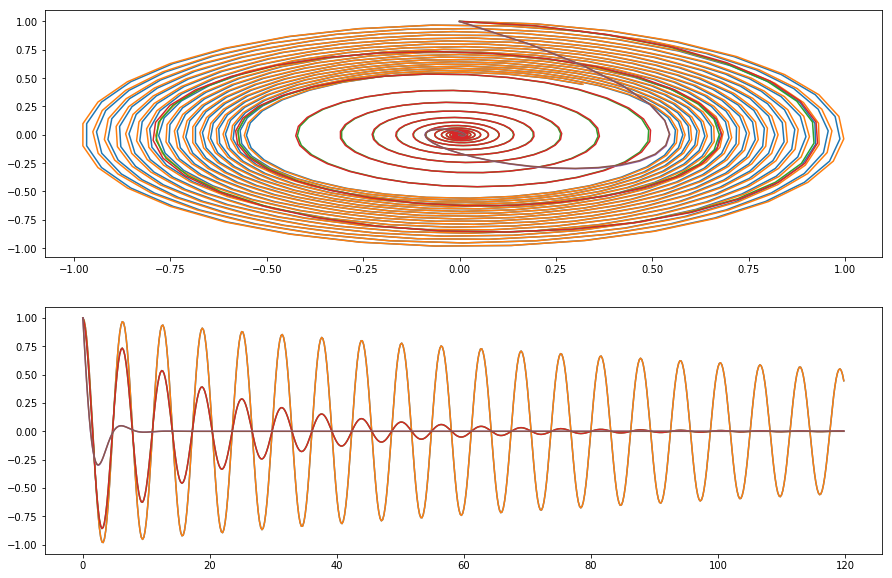

In [6]:
dt = 0.2
t0 = 0.0
tf = 120.0

tspan = np.arange(t0, tf, dt)

plt.figure(figsize=(15,10))

plt.subplot(211)
for (alpha, p0, q0) in [(0.01, 1.0, 0.0), (0.1, 1.0, 0.0), (1.0, 1.0, 0.0)]:
    do = Osc(alpha)
    
    sol, _, _ = ic.integrate(ic.step, do, tspan, p0, q0, 0.0)
    soll, _, _ = ic.integrate(ic.variational_step, do, tspan, p0, q0, 0.0)

    plt.plot(sol[:,1], sol[:,0])
    plt.plot(soll[:,1], soll[:,0])
    
plt.subplot(212)
for (alpha, p0, q0) in [(0.01, 1.0, 0.0), (0.1, 1.0, 0.0), (1.0, 1.0, 0.0)]:
    # FIXME: pointless to do it twice...
    sol, _, _ = ic.integrate(ic.step, do, tspan, p0, q0, 0.0)
    soll, _, _ = ic.integrate(ic.variational_step, do, tspan, p0, q0, 0.0)
        
    plt.plot(tspan, sol[:,0])
    plt.plot(tspan, soll[:,0])
plt.show()